In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
!pip install plotly

In [2]:
#In order to see all columns of dataframe
pd.set_option('display.max_columns', None)

In [3]:
#Create the Dataframe :
file=pd.read_csv('Mental Health in Tech Survey Results.csv')

SyntaxError: unmatched ')' (<ipython-input-3-70f7da75ebb8>, line 2)

In [ ]:
zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,,,,,,,,,,,,,,,,,,,,,1,"No, I don't know any","No, because it doesn't matter",N/A,"No, because it doesn't matter",I'm not sure,Yes,1-25%,1,1,I don't know,N/A (none offered),None did,None did,I don't know,Physical health,"No, none of my previous supervisors",0,,At some of my previous employers,0,,0,,6,0,Don't Know,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Don't Know,0,Yes,Not applicable to me,Sometimes,N/A,5,Maybe,It depend on if the discussion would have an impact on my employment,Maybe,Same reason. But I believe this would have a greater impact in employment,0,,,5,Maybe/Not sure,,"Yes, I experienced",,2,,,0,45,Male,United States of America,Connecticut,White,,United States of America,Connecticut				


In [4]:
#Data Processing:
# Dropping unnecessary columns
#Gender difference and Country of residence have a smaller impact on personality traits compared with the traits between similar gender and place and thus , they are saved in a Secondary Df and then dropped
#the links to reports are dropped 
Secondary=Df[['Link to report generated from their online content','What is your sex?','What age bracket do you fall in?','What is your country of residence?']]
Df=Df.drop(columns=['Link to report generated from their online content','What is your sex?','What age bracket do you fall in?','What is your country of residence?'])

In [5]:
Df

,[Am the life of the party.],[Feel little concern for others.],[Am always prepared.],[Get stressed out easily.],[Have a rich vocabulary.],[Don't talk a lot.],[Am interested in people.],[Leave my belongings around.],[Am relaxed most of the time.],[Have difficulty understanding abstract ideas.],[Feel comfortable around people.],[Insult people.],[Pay attention to details.],[Worry about things.],[Have a vivid imagination.],[Keep in the background.],[Sympathize with others' feelings.],[Make a mess of things.],[Seldom feel blue.],[Am not interested in abstract ideas.],[Start conversations.],[Am not interested in other people's problems.],[Get chores done right away.],[Am easily disturbed.],[Have excellent ideas.],[Have little to say.],[Have a soft heart.],[Often forget to put things back in their proper place.],[Get upset easily.],[Do not have a good imagination.],[Talk to a lot of different people at parties.],[Am not really interested in others.],[Like order.],[Change my mood a lot.],[Am quick to understand things.],[Don't like to draw attention to myself.],[Take time out for others.],[Shirk my duties.],[Have frequent mood swings.],[Use difficult words.],[Don't mind being the center of attention.],[Feel others' emotions.],[Follow a schedule.],[Get irritated easily.],[Spend time reflecting on things.],[Am quiet around strangers.],[Make people feel at ease.],[Am exacting in my work.],[Often feel blue.],[Am full of ideas.]
0,Very Accurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Moderately Inaccurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Very Accurate,Moderately Accurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Moderately Accurate,Very Inaccurate,Very Accurate,Very Inaccurate,Moderately Accurate,Moderately Inaccurate,Very Inaccurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Very Inaccurate,Moderately Inaccurate,Very Inaccurate,Moderately Inaccurate,Moderately Accurate,Very Inaccurate,Moderately Accurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Very Inaccurate,Moderately Inaccurate,Moderately Inaccurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Moderately Accurate,Very Accurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate
1,Very Inaccurate,Moderately Accurate,Moderately Accurate,Very Inaccurate,Moderately Inaccurate,Very Accurate,Moderately Accurate,Very Accurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Moderately Inaccurate,Very Inaccurate,Very Accurate,Very Accurate,Very Accurate,Very Accurate,Very Accurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Very Inaccurate,Moderately Inaccurate,Very Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Moderately Accurate,Very Accurate,Very Inaccurate,Very Inaccurate,Very Inaccurate,Moderately Inaccurate,Very Accurate,Very Accurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Very Accurate,Neither Accurate Nor Inaccurate,Moderately Inaccurate,Moderately Accurate,Moderately Inaccurate,Moderately Inaccurate,Moderately Accurate,Very Accurate,Very Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate
2,Moderately Inaccurate,Moderately Inaccurate,Very Accurate,Very Inaccurate,Very Accurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Moderately Inaccurate,Moderately Accurate,Very Inaccurate,Moderately Accurate,Moderately Inaccurate,Very Inaccurate,Very Inaccurate,Very Accurate,Moderately Inaccurate,Moderately Accurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Moderately Accurate,Moderately Inaccurate,Very Accurate,

In [6]:
#Convert the ratings into Numerical scale from 1 to 5 as: 1:Very Inaccurate ;2:Moderately Accurate ;3:Neither Accurate Nor Inaccurate;4:Moderately Accurate 5 very accurate 
Df=Df.replace({'Very Inaccurate':-2,'Moderately Inaccurate':-1,'Neither Accurate Nor Inaccurate':0,'Moderately Accurate':1,'Very Accurate':2})
#Rename the questions based on where they belong to in the big 5 indicators
Qsts_Values=['E1','A1','C1','N1','O1','E2','A2','C2','N2','O2','E3','A3','C3','N3','O3','E4','A4','C4','N4','O4','E5','A5','C5','N5','O5','E6','A6','C6','N6','O6','E7','A7','C7','N7','O7','E8','A8','C8','N8','O8','E9','A9','C9','N9','O9','E10','A10','C10','N10','O10']
Factors=['Factor1','Factor2','Factor3','Factor4','Factor5']
Df.columns=Qsts_Values

In [7]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   E1      10 non-null     int64
 1   A1      10 non-null     int64
 2   C1      10 non-null     int64
 3   N1      10 non-null     int64
 4   O1      10 non-null     int64
 5   E2      10 non-null     int64
 6   A2      10 non-null     int64
 7   C2      10 non-null     int64
 8   N2      10 non-null     int64
 9   O2      10 non-null     int64
 10  E3      10 non-null     int64
 11  A3      10 non-null     int64
 12  C3      10 non-null     int64
 13  N3      10 non-null     int64
 14  O3      10 non-null     int64
 15  E4      10 non-null     int64
 16  A4      10 non-null     int64
 17  C4      10 non-null     int64
 18  N4      10 non-null     int64
 19  O4      10 non-null     int64
 20  E5      10 non-null     int64
 21  A5      10 non-null     int64
 22  C5      10 non-null     int64
 23  N5      10 non-nul

In [8]:
Df

,E1,A1,C1,N1,O1,E2,A2,C2,N2,O2,E3,A3,C3,N3,O3,E4,A4,C4,N4,O4,E5,A5,C5,N5,O5,E6,A6,C6,N6,O6,E7,A7,C7,N7,O7,E8,A8,C8,N8,O8,E9,A9,C9,N9,O9,E10,A10,C10,N10,O10
0,2,-1,0,-1,-1,0,1,2,1,-1,0,0,1,-2,0,1,1,-2,2,-2,1,-1,-2,-1,0,-2,0,-2,-2,-1,-2,-1,1,-2,1,1,0,1,-2,-1,-1,1,0,-2,1,2,0,-2,-2,0
1,-2,1,1,-2,-1,2,1,2,0,-2,-1,-2,2,2,2,2,2,1,0,-2,-2,-1,-2,-2,0,1,1,2,-2,-2,-2,-1,2,2,1,0,-1,0,2,0,-1,1,-1,-1,1,2,-2,-2,0,1
2,-1,-1,2,-2,2,0,1,-1,1,-2,1,-1,-2,-2,2,-1,1,-1,0,-2,0,-2,1,-1,2,-2,-1,0,-1,-2,1,-1,0,-1,2,0,0,-1,0,2,0,1,1,0,0,0,0,-1,-1,1
3,0,-1,1,1,0,-2,2,-2,0,1,1,-2,1,1,2,-1,1,-1,0,-1,1,-1,1,1,1,-1,1,-2,1,-2,1,-1,2,1,1,0,1,-1,1,0,1,1,0,1,2,-1,1,1,1,2
4,0,0,0,-1,0,-2,-2,-1,0,0,0,-2,0,0,0,0,0,-1,-1,-2,-1,-2,0,-1,0,0,0,-1,-1,-2,0,0,0,-2,0,-1,0,-2,-2,0,0,0,0,-1,0,-1,0,0,-1,0
5,1,-2,1,-2,1,0,2,1,1,-2,1,-2,1,1,2,1,2,-1,1,-2,1,-1,-1,-1,2,-1,0,-1,-1,-2,1,-1,1,-2,-1,-1,1,-2,-2,-1,1,2,1,-2,1,0,1,1,-2,2
6,1,-2,1,1,2,0,2,-1,-1,-2,2,-1,1,1,1,-1,1,-2,-2,-1,1,-1,2,-1,1,-1,-1,1,0,-1,2,-2,1,0,1,1,1,-2,-1,1,-1,2,1,1,1,-1,0,1,1,1
7,1,-2,2,1,1,-1,2,1,1,-2,2,-2,2,2,2,1,2,1,1,-2,2,-2,0,-1,0,0,1,-1,-1,-2,1,-2,1,0,0,1,2,-1,-1,0,0,0,0,0,1,0,0,2,-1,0
8,-1,-2,1,2,2,0,-1,2,-1,0,-1,-2,0,2,2,1,2,1,2,-1,-2,0,2,2,1,2,2,2,1,1,-2,1,2,2,2,0,2,1,2,2,-1,-1,2,2,2,2,2,2,2,0
9,0,-1,-1,-1,-1,-2,2,2,1,-2,2,-2,2,1,2,-2,2,0,-1,-1,2,-2,-1,2,2,-2,1,0,0,-2,2,-2,0,1,2,-1,2,-2,0,0,2,1,-2,1,1,-2,2,-1,1,2


Starndardization

In [9]:
#Scaling the Data
scaler = StandardScaler()
scaled=Df.copy()
scaled=pd.DataFrame(scaler.fit_transform(scaled), columns=scaled.columns)
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      10 non-null     float64
 1   A1      10 non-null     float64
 2   C1      10 non-null     float64
 3   N1      10 non-null     float64
 4   O1      10 non-null     float64
 5   E2      10 non-null     float64
 6   A2      10 non-null     float64
 7   C2      10 non-null     float64
 8   N2      10 non-null     float64
 9   O2      10 non-null     float64
 10  E3      10 non-null     float64
 11  A3      10 non-null     float64
 12  C3      10 non-null     float64
 13  N3      10 non-null     float64
 14  O3      10 non-null     float64
 15  E4      10 non-null     float64
 16  A4      10 non-null     float64
 17  C4      10 non-null     float64
 18  N4      10 non-null     float64
 19  O4      10 non-null     float64
 20  E5      10 non-null     float64
 21  A5      10 non-null     float64
 22  C5   

In [10]:
scaled

,E1,A1,C1,N1,O1,E2,A2,C2,N2,O2,E3,A3,C3,N3,O3,E4,A4,C4,N4,O4,E5,A5,C5,N5,O5,E6,A6,C6,N6,O6,E7,A7,C7,N7,O7,E8,A8,C8,N8,O8,E9,A9,C9,N9,O9,E10,A10,C10,N10,O10
0,1.672857,0.106000,-0.917663,-0.420084,-1.245682,0.415227,0.000000,1.000000,0.896258,0.185695,-0.636364,2.412091,0.171499,-1.820364,-1.860521,0.737309,-0.603023,-1.341641,1.441153,-0.816497,0.493742,0.468521,-1.414214,-0.520306,-1.083473,-1.093216,-0.436436,-1.285714,-1.372813,0.542326,-1.432078,0.000000,0.000000,-1.255555,0.106000,1.290994,-0.816497,1.672857,-1.143544,-1.293548,-1.0,0.229416,-0.185695,-1.461538,0.000000,1.382047,-0.359211,-1.452600,-1.356801,-1.083473
1,-1.848947,2.225996,0.229416,-1.120224,-1.245682,2.076137,0.000000,1.000000,-0.384111,-0.742781,-1.545455,-0.603023,1.028992,0.980196,0.620174,1.556541,0.904534,1.341641,-0.160128,-0.816497,-1.622295,0.468521,-1.414214,-1.263600,-1.083473,1.249390,0.654654,1.571429,-1.372813,-0.542326,-1.432078,0.000000,1.290994,1.387719,0.106000,0.000000,-1.837117,0.792406,1.547147,-0.298511,-1.0,0.229416,-1.114172,-0.692308,0.000000,1.382047,-2.155264,-1.452600,0.150756,0.120386
2,-0.968496,0.106000,1.376494,-1.120224,1.245682,0.415227,0.000000,-1.000000,0.896258,-0.742781,0.272727,0.904534,-2.400980,-1.820364,0.620174,-0.901155,-0.603023,-0.447214,-0.160128,-0.816497,-0.211604,-1.093216,0.707107,-0.520306,1.324244,-1.093216,-1.527525,0.142857,-0.392232,-0.542326,0.520756,0.000000,-1.290994,-0.594737,1.165998,0.000000,-0.816497,-0.088045,0.201802,1.691563,0.0,0.229416,0.742781,0.076923,-1.581139,-0.072739,-0.359211,-0.760886,-0.603023,0.120386
3,-0.088045,0.106000,0.229416,0.980196,-0.415227,-1.245682,0.745356,-1.666667,-0.384111,2.042649,0.272727,-0.603023,0.171499,0.280056,0.620174,-0.901155,-0.603023,-0.447214,-0.160128,1.224745,0.493742,0.468521,0.707107,0.966282,0.120386,-0.312348,0.654654,-1.285714,1.568929,-0.542326,0.520756,0.000000,1.290994,0.726900,0.106000,0.000000,0.204124,-0.088045,0.874475,-0.298511,1.0,0.229416,-0.185695,0.846154,1.581139,-0.800132,0.538816,0.622543,0.904534,1.324244
4,-0.088045,1.165998,-0.917663,-0.420084,-0.415227,-1.245682,-2.236068,-1.000000,-0.384111,1.114172,-0.636364,-0.603023,-0.685994,-0.420084,-1.860521,-0.081923,-2.110579,-0.447214,-0.960769,-0.816497,-0.916949,-1.093216,0.000000,-0.520306,-1.083473,0.468521,-0.436436,-0.571429,-0.392232,-0.542326,-0.130189,1.118034,-1.290994,-1.255555,-0.953998,-1.290994,-0.816497,-0.968496,-1.143544,-0.298511,0.0,-0.917663,-0.185695,-0.692308,-1.581139,-0.800132,-0.359211,-0.069171,-0.603023,-1.083473
5,0.792406,-0.953998,0.229416,-1.120224,0.415227,0.415227,0.745356,0.333333,0.896258,-0.742781,0.272727,-0.603023,0.171499,0.280056,0.620174,0.737309,0.904534,-0.447214,0.640513,-0.816497,0.493742,0.468521,-0.707107,-0.520306,1.324244,-0.312348,-0.436436,-0.571429,-0.392232,-0.542326,0.520756,0.000000,0.000000,-1.255555,-2.013996,-1.290994,0.204124,-0.968496,-1.143544,-1.293548,1.0,1.376494,0.742781,-1.461538,0.000000,-0.072739,0.538816,0.622543,-1.356801,1.324244
6,0.792406,-0.953998,0.229416,0.980196,1.245682,0.415227,0.745356,-1.000000,-1.664479,-0.742781,1.181818,0.904534,0.171499,0.280056,-0.620174,-0.901155,-0.603023,-1.341641,-1.761410,1.224745,0.493742,0.468521,1.414214,-0.520306,0.120386,-0.312348,-1.527525,0.857143,0.588348,0.542326,1.171700,-1.118034,0.000000,0.066082,0.106000,1.290994,0.204124,-0.968496,-0.470871,0.696526,-1.0,1.376494,0.742781,0.846154,0.000000,-0.800132,-0.359211,0.622543,0.904534,0.120386
7,0.792406,-0.953998,1.376494,0.980196,0.415227,-0.415227,0.745356,0.333333,0.896258,-0.742781,1.181818,-0.603023,1.028992,0.980196,0.620174,0.737309,0.904534,1.341641,0.640513,-0.816497,1.199088,-1.093216,0.000000,-0.520306,-1.083473,0.468521,0.654654,-0.571429,-0.392232,-0.542326,0.520756,-1.118034,0.000000,0.066082,-0.953998,1.290994,1.224745,-0.088045,-0.470871,-0.298511,0.0,-0.917663,-0.185695,0.076923,0.000000,-0.072739,-0.359211,1.314257,-0.603023,-1.083473
8,-0.968496,-0.953998,0.229416,1.680336,1.245682,0.415227,-1.490712

Factor Analysis

In [11]:
#Performing Factor Analysis
factor= FactorAnalysis(n_components=5,random_state=101).fit(scaled)
x_new=factor.transform(scaled)
x_new

array([[ 0.25716723, -1.48717711,  0.56974084, -1.19170811,  0.17770006],
       [ 2.45435058,  0.22693847, -0.85586877, -0.21754023, -1.34484649],
       [-0.32824188, -0.34943182,  0.21383208,  1.30684325, -0.27859525],
       [-0.01228266,  0.82437816, -0.37274887,  0.67023111,  0.77858072],
       [ 0.57784449, -1.3117448 ,  0.55217102,  1.60517409,  0.92410892],
       [-0.82693323, -1.06332949,  0.5255969 , -1.22381418, -0.21505679],
       [-1.23695005,  0.62160862, -0.14310438,  1.00567736, -1.2020504 ],
       [-1.02166087,  0.22227231, -0.69636963, -0.64964221, -1.19853648],
       [ 0.38363068,  1.85163614,  2.0582558 , -0.64071273,  0.52708939],
       [-0.24692428,  0.46484952, -1.851505  , -0.66450835,  1.83160632]])

In [12]:
factor.components_

array([[-0.66344614,  0.86797493, -0.19397856, -0.32837062, -0.55443738,
         0.43956695, -0.43570127,  0.32398447, -0.16814746,  0.19899759,
        -0.81968268, -0.15842272,  0.10367226,  0.10163932, -0.05371614,
         0.47287935,  0.02481716,  0.39046213,  0.12617951, -0.22709348,
        -0.74837001,  0.21905138, -0.45228964, -0.15377245, -0.4417921 ,
         0.46335004,  0.38252898,  0.37285664, -0.33856471,  0.0185594 ,
        -0.73863748,  0.43051476,  0.36445035,  0.37857243,  0.20205122,
        -0.19435026, -0.64303448,  0.48151063,  0.53182411, -0.05536451,
        -0.31912629, -0.27384533, -0.33289286, -0.20165836,  0.01924964,
         0.53503635, -0.491625  , -0.56721249,  0.08914896, -0.1544697 ],
       [-0.45342201, -0.26394535,  0.19982837,  0.70554859,  0.3489536 ,
         0.02297361,  0.09702606,  0.0441499 , -0.59998868,  0.19179915,
        -0.00449971, -0.40736857,  0.12197532,  0.63869705,  0.61722601,
        -0.16785859,  0.45439444,  0.53058421, -0.

In [13]:
#components_ attribute,returns an array containing measures of the relationship between the newly created factors, placed in rows, and the original features, placed in columns:
#At the intersection of each factor and feature, a positive number indicates that a positive proportion exists between the two; a negative number, instead, points out that they diverge and one is the contrary to the other
Components_df=pd.DataFrame(factor.components_,columns=scaled.columns)

In [14]:
#We got 5 components out of 50 variable Questions
Components_df.T

,0,1,2,3,4
E1,-0.663446,-0.453422,0.023354,-0.306595,0.015932
A1,0.867975,-0.263945,-0.307818,0.283929,0.034235
C1,-0.193979,0.199828,0.240721,0.180407,-0.716024
N1,-0.328371,0.705549,0.270727,0.018547,0.012305
O1,-0.554437,0.348954,0.516944,0.294306,-0.330950
E2,0.439567,0.022974,0.193396,-0.249737,-0.710848
A2,-0.435701,0.097026,-0.619477,-0.327670,-0.285618
C2,0.323984,0.044150,-0.013795,-0.837370,-0.002075
N2,-0.168147,-0.599989,-0.403810,-0.356940,0.127023
O2,0.198998,0.191799,0.433817,0.255137,0.502848


In [15]:
abs_df=Components_df.abs()

In [16]:
abs_df.T

,0,1,2,3,4
E1,0.663446,0.453422,0.023354,0.306595,0.015932
A1,0.867975,0.263945,0.307818,0.283929,0.034235
C1,0.193979,0.199828,0.240721,0.180407,0.716024
N1,0.328371,0.705549,0.270727,0.018547,0.012305
O1,0.554437,0.348954,0.516944,0.294306,0.330950
E2,0.439567,0.022974,0.193396,0.249737,0.710848
A2,0.435701,0.097026,0.619477,0.327670,0.285618
C2,0.323984,0.044150,0.013795,0.837370,0.002075
N2,0.168147,0.599989,0.403810,0.356940,0.127023
O2,0.198998,0.191799,0.433817,0.255137,0.502848


In [17]:
abs_df.max(axis=1)       #E ,N,C,

0    0.867975
1    0.916144
2    0.860857
3    0.837370
4    0.741666
dtype: float64

In [18]:
abs_T=abs_df.T

In [19]:
abs_T.columns=Factors

In [20]:
np.sum(abs_T['Factor1']>0.5)

10

In [21]:
#In order to Interpret the results we need to Know the effect of each question on each factor to know what the factors represent
for i in range(1,5):
    print(abs_T['Factor'+str(i)]>0.5)

E1      True
A1      True
C1     False
N1     False
O1      True
E2     False
A2     False
C2     False
N2     False
O2     False
E3      True
A3     False
C3     False
N3     False
O3     False
E4     False
A4     False
C4     False
N4     False
O4     False
E5      True
A5     False
C5     False
N5     False
O5     False
E6     False
A6     False
C6     False
N6     False
O6     False
E7      True
A7     False
C7     False
N7     False
O7     False
E8     False
A8      True
C8     False
N8      True
O8     False
E9     False
A9     False
C9     False
N9     False
O9     False
E10     True
A10    False
C10     True
N10    False
O10    False
Name: Factor1, dtype: bool
E1     False
A1     False
C1     False
N1      True
O1     False
E2     False
A2     False
C2     False
N2      True
O2     False
E3     False
A3     False
C3     False
N3      True
O3      True
E4     False
A4     False
C4      True
N4     False
O4      True
E5     False
A5     False
C5      True
N5      True
O5     Fals

In [22]:
factor.get_covariance().shape

(50, 50)

Based On factor Analysis :  
Factor 1 : Extraversion  
Factor 2 : Neuroticism  
Factor 3 : Agreeableness  
Factor 4 : Consciountness  
Factor 5 : Openness  

In [25]:
Persons=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']

In [26]:
#Performing PCA on Scaled 
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = Factors,index=Persons)


In [27]:
principalComponents

array([[-3.11975349,  4.73831378, -1.1325527 ,  2.74579669,  2.35176319],
       [ 1.70429429,  5.76755357,  4.20326863, -2.29199573, -2.16810507],
       [-2.35319976, -0.0548314 , -3.00705583, -2.608317  , -2.82960588],
       [ 1.50203726, -3.61720876,  0.28373941, -0.0738003 ,  1.46461309],
       [-2.38041935,  1.5724183 , -2.43472926, -2.93606598,  3.27308312],
       [-2.9472666 , -0.38015655,  1.21534839,  2.2941413 , -0.71932245],
       [-0.24204822, -2.80581164, -2.93089073,  0.62026339, -2.82357765],
       [-0.29490715, -0.54237655,  1.27349742,  3.45737184, -1.02927846],
       [ 9.67024045,  0.43189736, -1.50360232,  0.49328745,  0.95234986],
       [-1.53897743, -5.1097981 ,  4.03297698, -1.70068166,  1.52808026]])

In [28]:
principalDf['colors']=np.array(Persons).T

In [29]:
principalDf

,Factor1,Factor2,Factor3,Factor4,Factor5,colors
P1,-3.119753,4.738314,-1.132553,2.745797,2.351763,P1
P2,1.704294,5.767554,4.203269,-2.291996,-2.168105,P2
P3,-2.353200,-0.054831,-3.007056,-2.608317,-2.829606,P3
P4,1.502037,-3.617209,0.283739,-0.073800,1.464613,P4
P5,-2.380419,1.572418,-2.434729,-2.936066,3.273083,P5
P6,-2.947267,-0.380157,1.215348,2.294141,-0.719322,P6
P7,-0.242048,-2.805812,-2.930891,0.620263,-2.823578,P7
P8,-0.294907,-0.542377,1.273497,3.457372,-1.029278,P8
P9,9.670240,0.431897,-1.503602,0.493287,0.952350,P9
P10,-1.538977,-5.109798,4.032977,-1.700682,1.528080,P10


<AxesSubplot:xlabel='Factor1'>

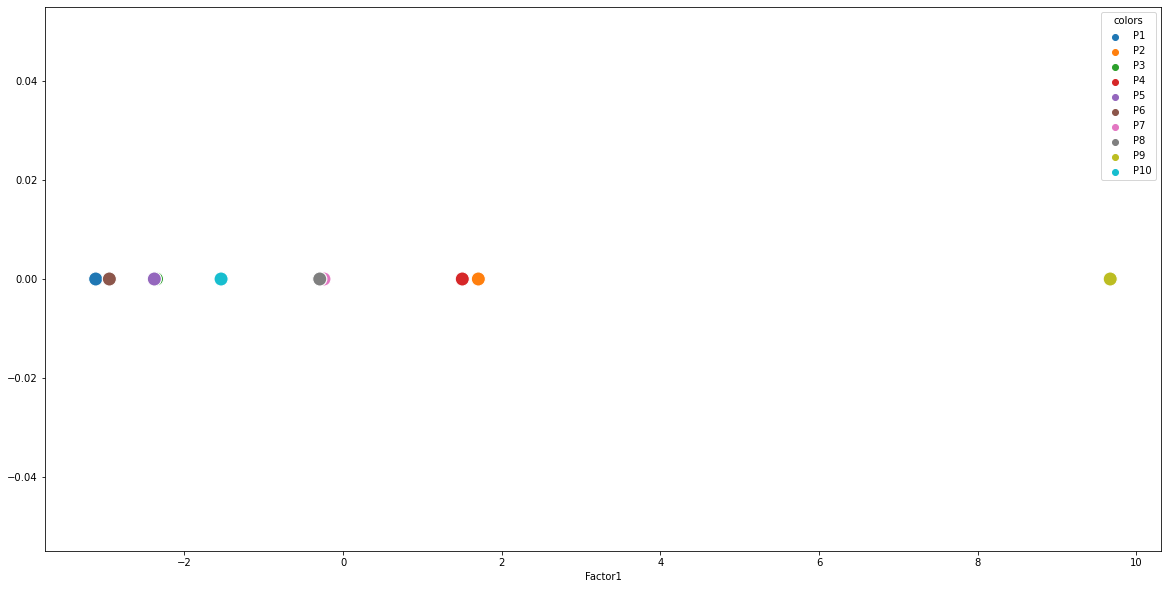

In [30]:
plt.figure(figsize=(20, 10))
sns.scatterplot(principalDf['Factor1'], [0] * len(principalDf), hue=principalDf['colors'], s=200)

In [31]:
principalDf

,Factor1,Factor2,Factor3,Factor4,Factor5,colors
P1,-3.119753,4.738314,-1.132553,2.745797,2.351763,P1
P2,1.704294,5.767554,4.203269,-2.291996,-2.168105,P2
P3,-2.353200,-0.054831,-3.007056,-2.608317,-2.829606,P3
P4,1.502037,-3.617209,0.283739,-0.073800,1.464613,P4
P5,-2.380419,1.572418,-2.434729,-2.936066,3.273083,P5
P6,-2.947267,-0.380157,1.215348,2.294141,-0.719322,P6
P7,-0.242048,-2.805812,-2.930891,0.620263,-2.823578,P7
P8,-0.294907,-0.542377,1.273497,3.457372,-1.029278,P8
P9,9.670240,0.431897,-1.503602,0.493287,0.952350,P9
P10,-1.538977,-5.109798,4.032977,-1.700682,1.528080,P10


In [32]:
#Scaling the Data will help better vizaulize it
scale_C = StandardScaler()
scale_C=principalDf.copy().drop(columns='colors')
scale_C=pd.DataFrame(scaler.fit_transform(scale_C), columns=scale_C.columns)

In [33]:
scale_C.index=Persons

In [34]:
scale_C

,Factor1,Factor2,Factor3,Factor4,Factor5
P1,-0.862576,1.456160,-0.446928,1.240947,1.122592
P2,0.471218,1.772461,1.658696,-1.035854,-1.034925
P3,-0.650633,-0.016851,-1.186646,-1.178814,-1.350686
P4,0.415296,-1.111626,0.111969,-0.033354,0.699119
P5,-0.658159,0.483229,-0.960794,-1.326938,1.562376
P6,-0.814885,-0.116828,0.479601,1.036824,-0.343362
P7,-0.066924,-0.862271,-1.156589,0.280324,-1.347808
P8,-0.081538,-0.166681,0.502548,1.562539,-0.491316
P9,2.673710,0.132729,-0.593352,0.222938,0.454595
P10,-0.425510,-1.570323,1.591495,-0.768613,0.729415


Based On PCA:  

Factor 1 : Extraversion  
Factor 2 : Neuroticism  
Factor 3 : Agreeableness  
Factor 4 : Consciountness  
Factor 5 : Openness  

#Considering :  
               Above 1.5: High      
               Below-1.5: Low    
               between -1 &   1 : Average    
               between -1.5 & -1: Moderately Low    
               between 1 & 1.5  : Moderately High    
Person 1 :high Neuroticism levels 1.45 & High Consciountiousness 1.24 Moderately High Openness 1.12 Average   Agreebleness rates(high disagreeableness) :-0,44 & high introversion (-0,86 of low Extraversion)  

Person 2 :high Neuroticism levels 1.77 & High agreeableness 1;65 Average Extraversion 0.47 Low   Consciountiousness & low Openness-1.03 
Person 3 :Very Low Openness rate -1.35 Moderately Low Agreeableness & Consciountiousness -1.18 Average Neuroticism -0.01 Low Extraversion 
Person 4 :Moderately low level of Neuroticism -1.1 Low Extraversion 0.4 & Moderaly high Openness 0.69 Average Agreeableness & Consciountiousness 0.11 / -0.03  
 Person 5 :High Openness rate 1.56 Moderatly low Consciountiousness -1.32 Average Neuroticism 0.48 Average   Extraversion -0.65 Average Agreeableness -0.96   
 Person 6 :Average Extraversion & Neuroticism & Agreeableness & Moderately high Consciountiousness   
 Person 7 :Moderately Low Agreeableness & Openness & Average Extraversion Neuroticism & Consciountiousness.   Person 8 :high Consciountiousness 1.56 & Average Openness & Agreeableness & Neuroticism & Extraversion  
  Person 9 :High Extraversion 2.67 & Average Openness & Agreeableness & Neuroticism & Consciountiousnes   
  Person 10 : Moderately low Neuroticism -1.57 & Moderately High Agreeableness 1.59 & Average Consciountiousnes   Average Extraversion Average Openness  

#Comparing Agreeableness & Cosnciountness  
P1 :Based on the report has Low Agreeableness levels  & Average Cosnciountness levels while their   interpretation in my work show Moderately high Cosnciountness and average Agreeableness.  
P2 :Based on the report  has Average Cosnciountness and High Agreeableness while their interpretation shows   High Agreeableness & Moderately low Cosnciountness.  
P3 :Based on their report has Average Cosnciountness & High Agreeableness while in the interpretation it is   Moderately Low Agreeableness & Consciountiousness.  
P4 : Based on report :High Agreeableness average Consciountiousness while the interpretation shows Average for both.  
P5 : Based on report :High Agreeableness & Average Consciountiousness   while interpretation shows Moderately   low Consciountiousness and average Agreeableness  
P6 : Based on the report :High Agreeableness & Average Cosnciountness while interpretation shows Moderately   high Consciountiousness & Average Agreeableness    
P7 :Based on the report :High Agreeableness & Average Cosnciountness while interpretation shows Moderately low Agreeableness & Average Consciountiousness.  
P8 :Report shows: High Agreeableness & Average Consciountness while Interpretation shows high   Consciountiousness &Average Agreeableness  
P9 : Report shows High Agreeableness & Average Consciountness while Interpretation shows Average Agreeableness &   Consciountiousness .  
P10 : report shows High Consciountiousness & High Agreeableness while interpretation shows :Moderately high   Agreeableness & Average Consciountiousness  